## Course Announcements

- A6 due Friday (11:59 PM)
- Please fill out your CAPEs
    - Current: ~30%
- Final Project Due Thurs 3/19 (11:59 PM)
    - Notebook with full report to GitHub Repo
    - Extra Credit video (*optional*) to Canvas
    - Completed Group-work survey

# Geospatial Analysis

- Analysis:
    - Exploratory Spatial Data Analysis
    - K-Nearest Neighbors

- Tools:
    - `shapely` - create and manipulate shape ojbects
    - `geopandas` - shapely + dataframe + visualization
   

Today's notes are adapted from the [Scipy 2018 Tutorial - Introduction to Geospatial Data Analysis with Python](https://github.com/geopandas/scipy2018-geospatial-data).

To get all notes and examples from this workshop, do the following:
```
git clone https://github.com/geopandas/scipy2018-geospatial-data    # get materials
conda env create -f environment.yml                                 # download packages
python check_environment.py                                         # check environment 
```

Additional resource for mapping data with `geopandas`: http://darribas.org/gds15/content/labs/lab_03.html

In [ ]:
# uncomment below if not yet installed
# !pip install --user geopandas
# !pip install --user descartes

In [2]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# `geopandas` basics

Examples here are from `geopandas` documentation: http://geopandas.org/mapping.html

## The Data

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [4]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1    POLYGON ((33.90371119710453 -0.950000000000000...  
2    POLYGON ((-8.665589565454809 27.65642588959236...  
3    (POLYGON ((-122.84 49.00000000000011, -122.974...  
4    (POLYGON ((-122.84 49.00000000000011, -120 49....  
..                                                 ...  
172  POLYGON ((18.82982479287395 45.90887235802528,...  
173  POLYGON ((20.07070000000004 42.58863000000008,...  
174  POLYGON ((20.59024654668023 41.85540891928363,...  
175  POLYGON ((-61.68000000000001 10.76, -61.105 10...  
176  POLYGON ((30.83385242171543 3.509171604222463,...  

[177 rows x 6 columns]

In [5]:
cities

name                                      geometry
0    Vatican City   POINT (12.45338654497177 41.90328217996012)
1      San Marino     POINT (12.44177015780014 43.936095834768)
2           Vaduz   POINT (9.516669472907267 47.13372377429357)
3      Luxembourg   POINT (6.130002806227083 49.61166037912108)
4         Palikir   POINT (158.1499743237623 6.916643696007725)
..            ...                                           ...
197         Cairo   POINT (31.24802236112612 30.05190620510371)
198         Tokyo   POINT (139.7494615705447 35.68696276437117)
199         Paris    POINT (2.33138946713035 48.86863878981461)
200      Santiago  POINT (-70.66898671317483 -33.4480679569341)
201     Singapore    POINT (103.853874819099 1.294979325105942)

[202 rows x 2 columns]

## Population Estimates

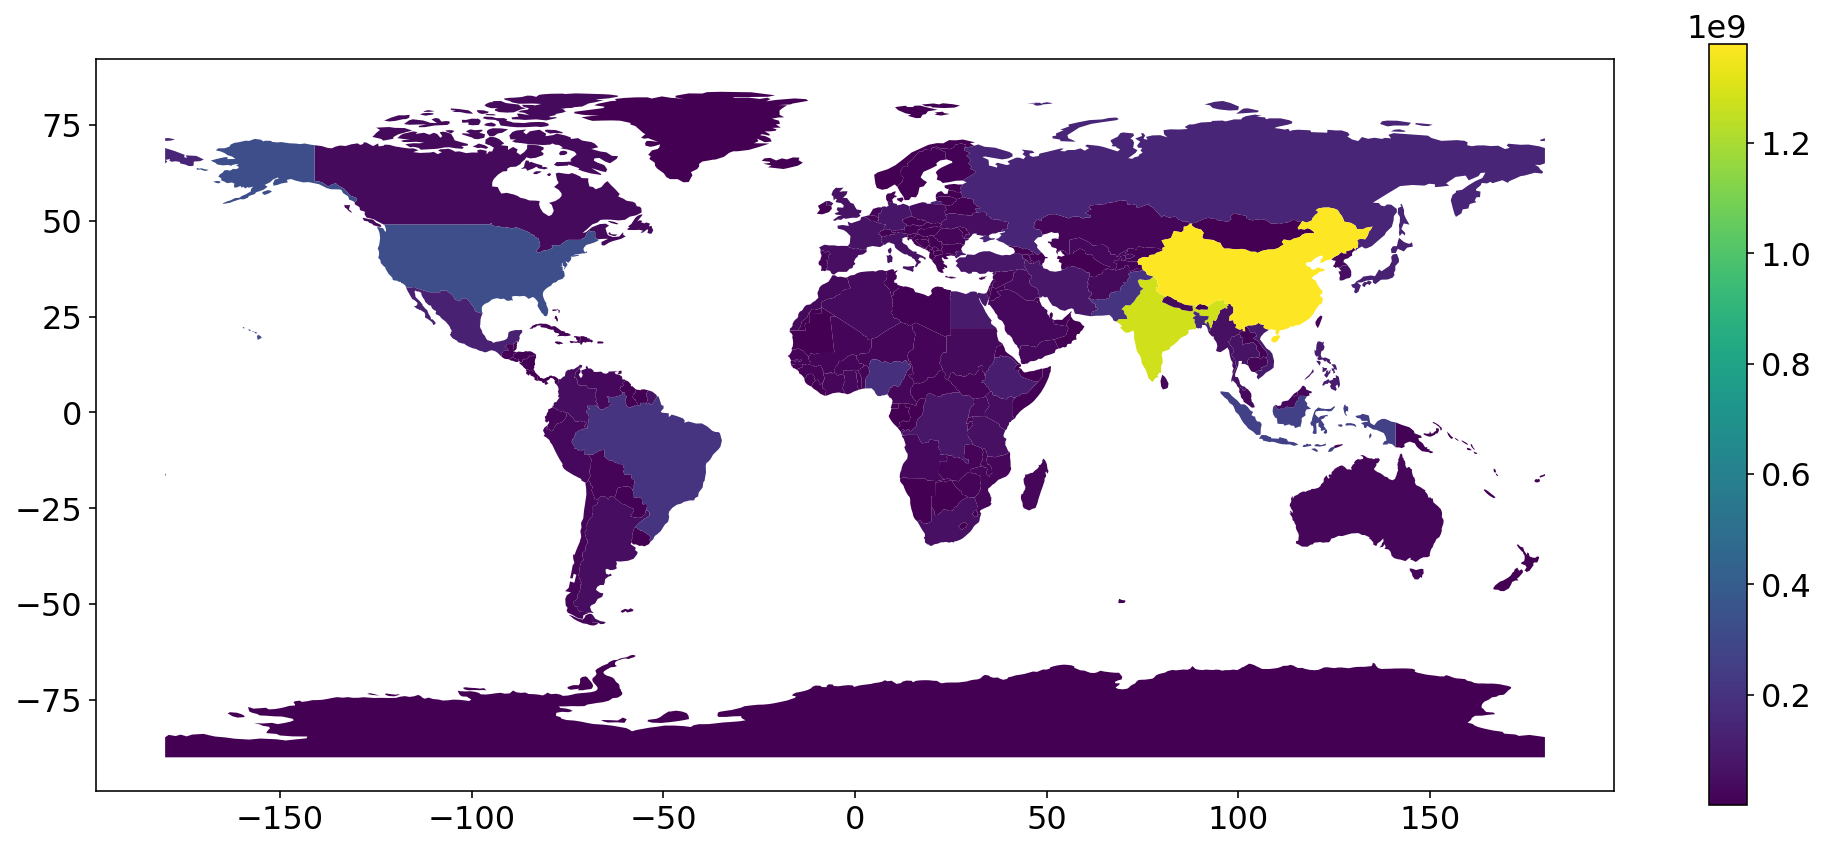

In [6]:
# Plot population estimates with an accurate legend
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
world.plot(column='pop_est', ax=ax, legend=True);

## iclicker Question #1

What would you do to improve this map?

- A) I'm completely lost
- B) I've got some ideas
- C) I'm a little unsure
- D) I like it as it is

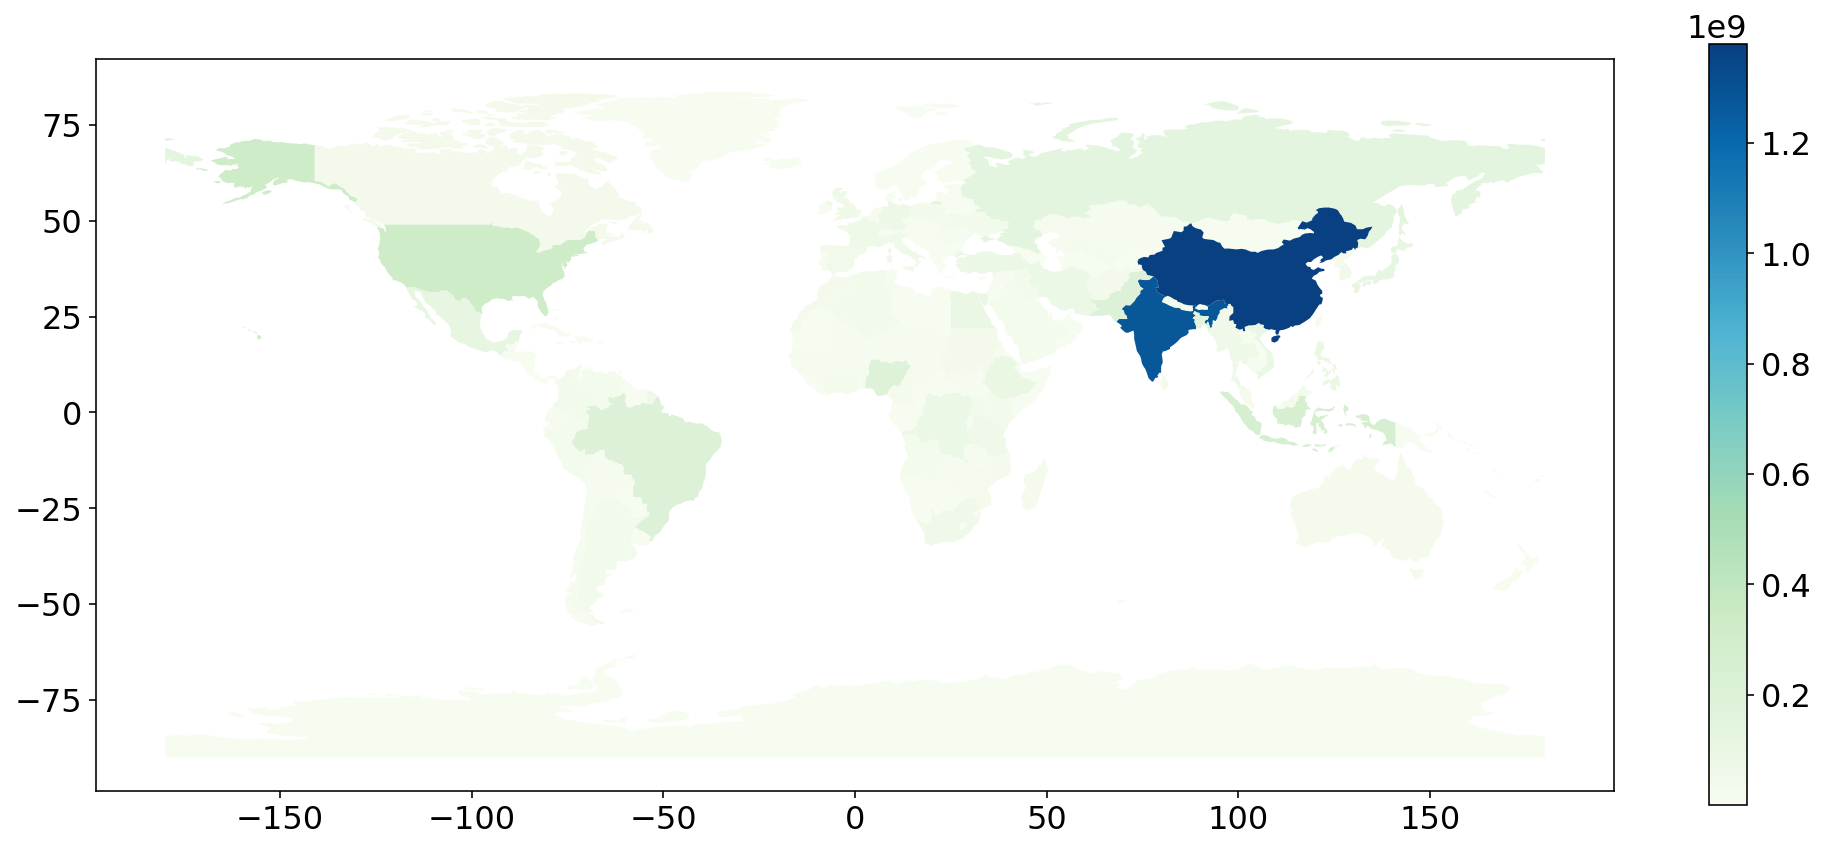

In [7]:
# Plot population estimates with a different color scale
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
world.plot(column='pop_est', ax=ax, cmap='GnBu', legend=True);

## GDP per capita

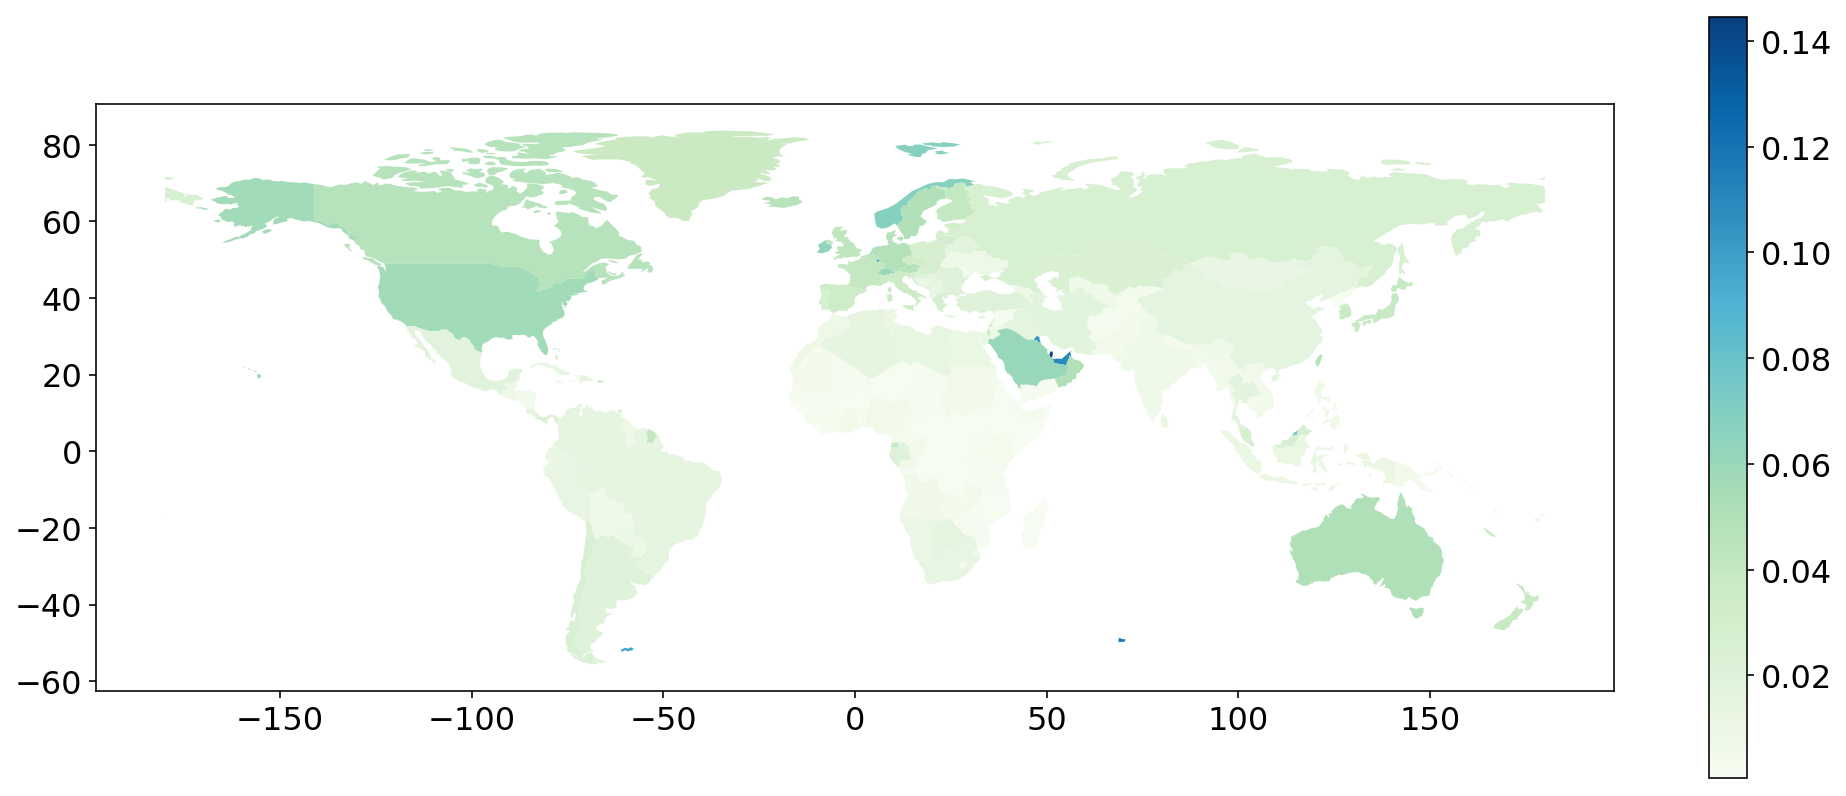

In [8]:
# Plot by GDP per capita

# specify data
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

# plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
world.plot(column='gdp_per_cap', ax = ax, figsize=(17, 6), cmap='GnBu', legend = True);

In [9]:
world[world['gdp_per_cap'] > 0.08]

pop_est                continent                    name iso_a3  \
20      2931            South America            Falkland Is.    FLK   
23       140  Seven seas (open ocean)  Fr. S. Antarctic Lands    ATF   
84   6072475                     Asia    United Arab Emirates    ARE   
85   2314307                     Asia                   Qatar    QAT   
86   2875422                     Asia                  Kuwait    KWT   
128   594130                   Europe              Luxembourg    LUX   

     gdp_md_est                                           geometry  \
20        281.8  POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51...   
23         16.0  POLYGON ((68.935 -48.62500000000001, 69.58 -48...   
84     667200.0  POLYGON ((51.57951867046327 24.24549713795111,...   
85     334500.0  POLYGON ((50.81010827006958 24.75474253997138,...   
86     301100.0  POLYGON ((47.9745190773499 29.9758192001485, 4...   
128     58740.0  POLYGON ((6.043073357781111 50.12805166279423,...   

     gdp_per_cap  
20      0.096145  
23      0.114286  
84      0.109873  
85      0.144536  
86      0.104715  
128     0.098867

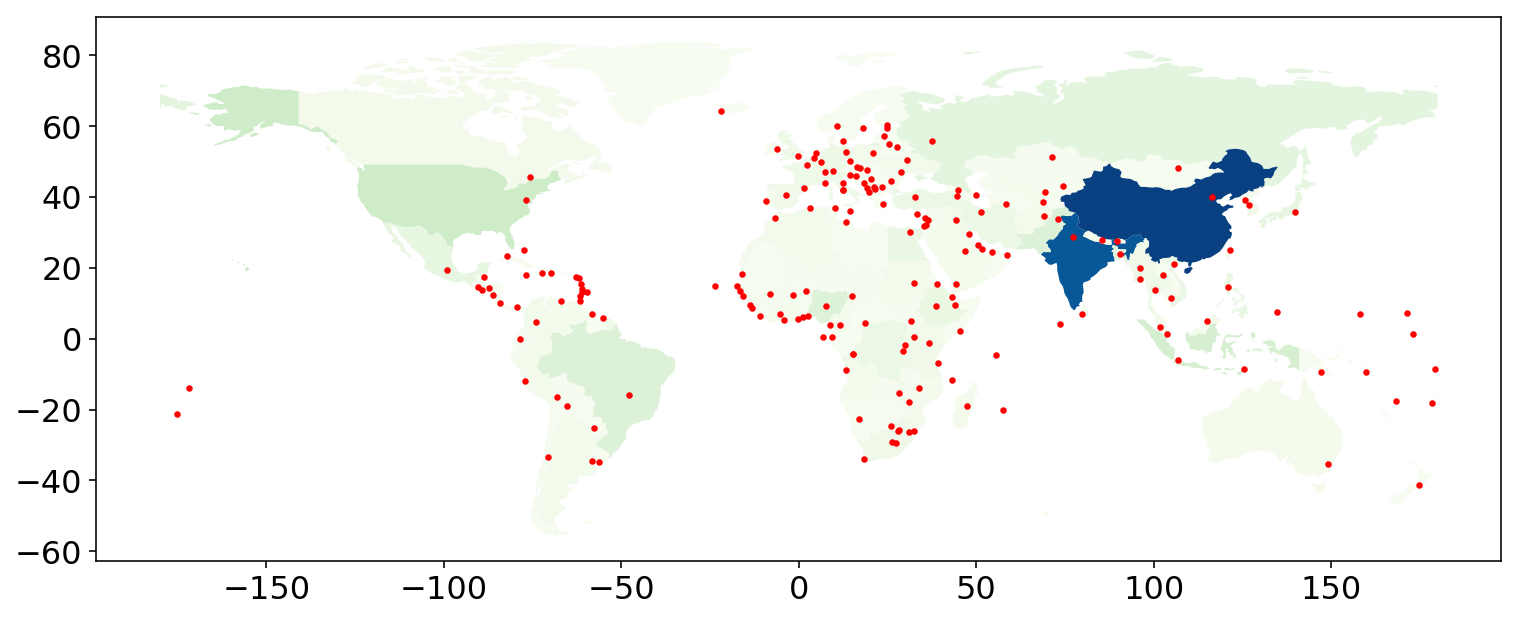

In [10]:
# combining maps
base = world.plot(column='pop_est', cmap='GnBu')
cities.plot(ax=base, marker='o', color='red', markersize=5);

## Geospatial Analysis

- Data
- EDA (Visualization)
- Analysis

### District data: Berlin

In [11]:
# berlin districts
df = gpd.read_file('https://raw.githubusercontent.com/geopandas/scipy2018-geospatial-data/master/data/berlin-districts.geojson')

In [12]:
df.shape

(138, 4)

In [13]:
df.head()

district        district_group  \
0             Blankenfelde/Niederschönhausen                Pankow   
1                             Helmholtzplatz                Pankow   
2                         Wiesbadener Straße  Charlottenburg-Wilm.   
3  Schmöckwitz/Karolinenhof/Rauchfangswerder    Treptow - Köpenick   
4                                 Müggelheim    Treptow - Köpenick   

   median_price                                           geometry  
0          37.5  (POLYGON ((1493006.880445722 6912074.798336806...  
1          58.0  (POLYGON ((1493245.549433984 6900059.69597819,...  
2          50.0  (POLYGON ((1481381.45206371 6885170.697768607,...  
3          99.0  (POLYGON ((1526159.828554794 6872101.043604896...  
4          25.0  (POLYGON ((1529265.085750472 6874326.842288786...

### Exploratory Spatial Data Analysis

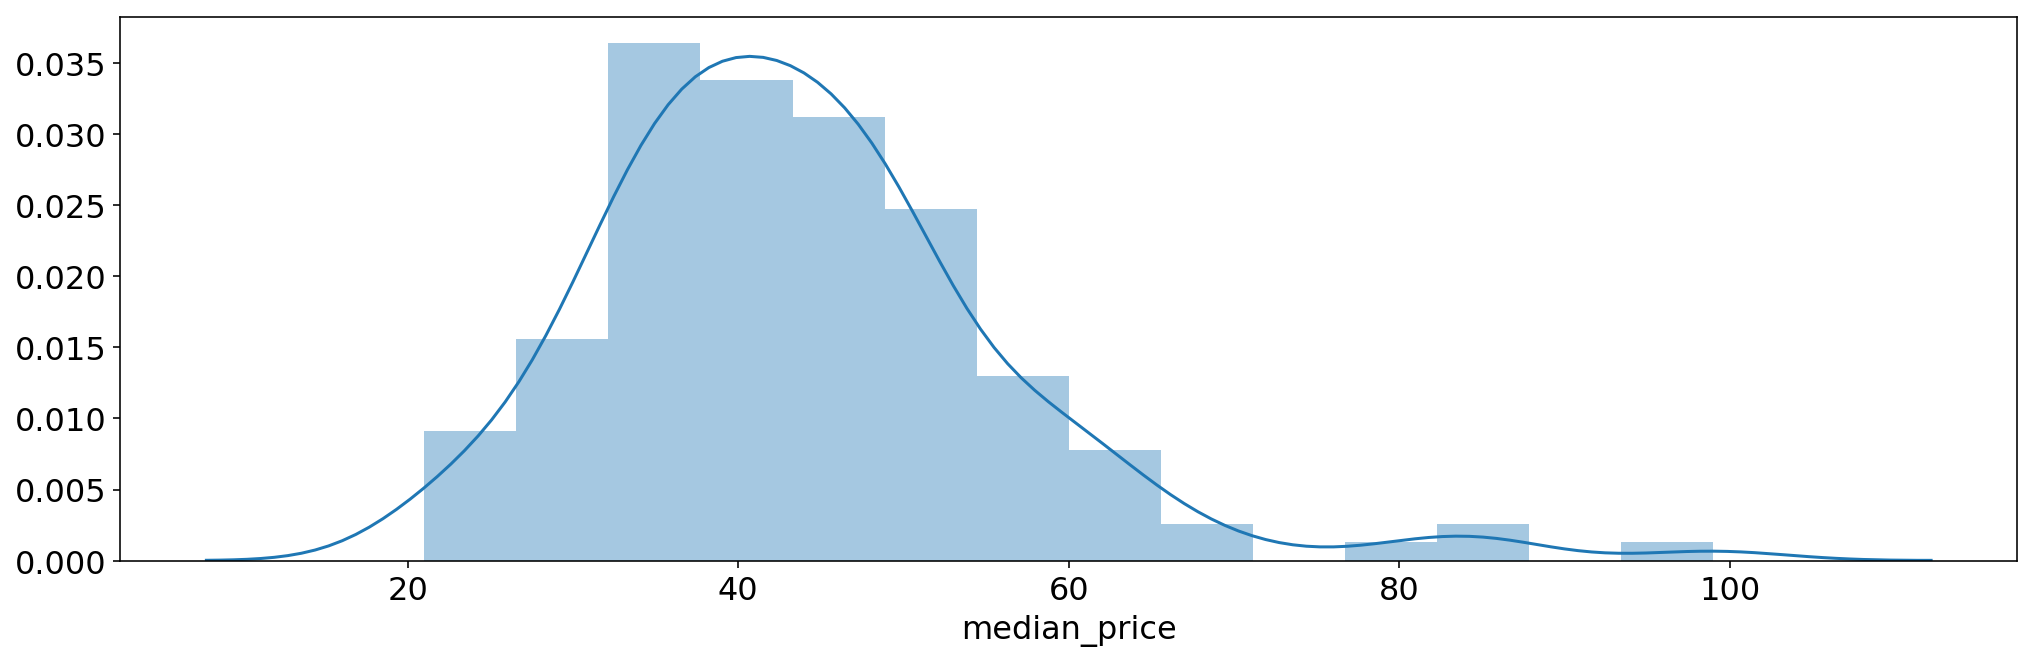

In [14]:
sns.distplot(df['median_price']);

We get an idea of what the median price for listings in this area of Berlin is, but we don't know how this information is spatially related.

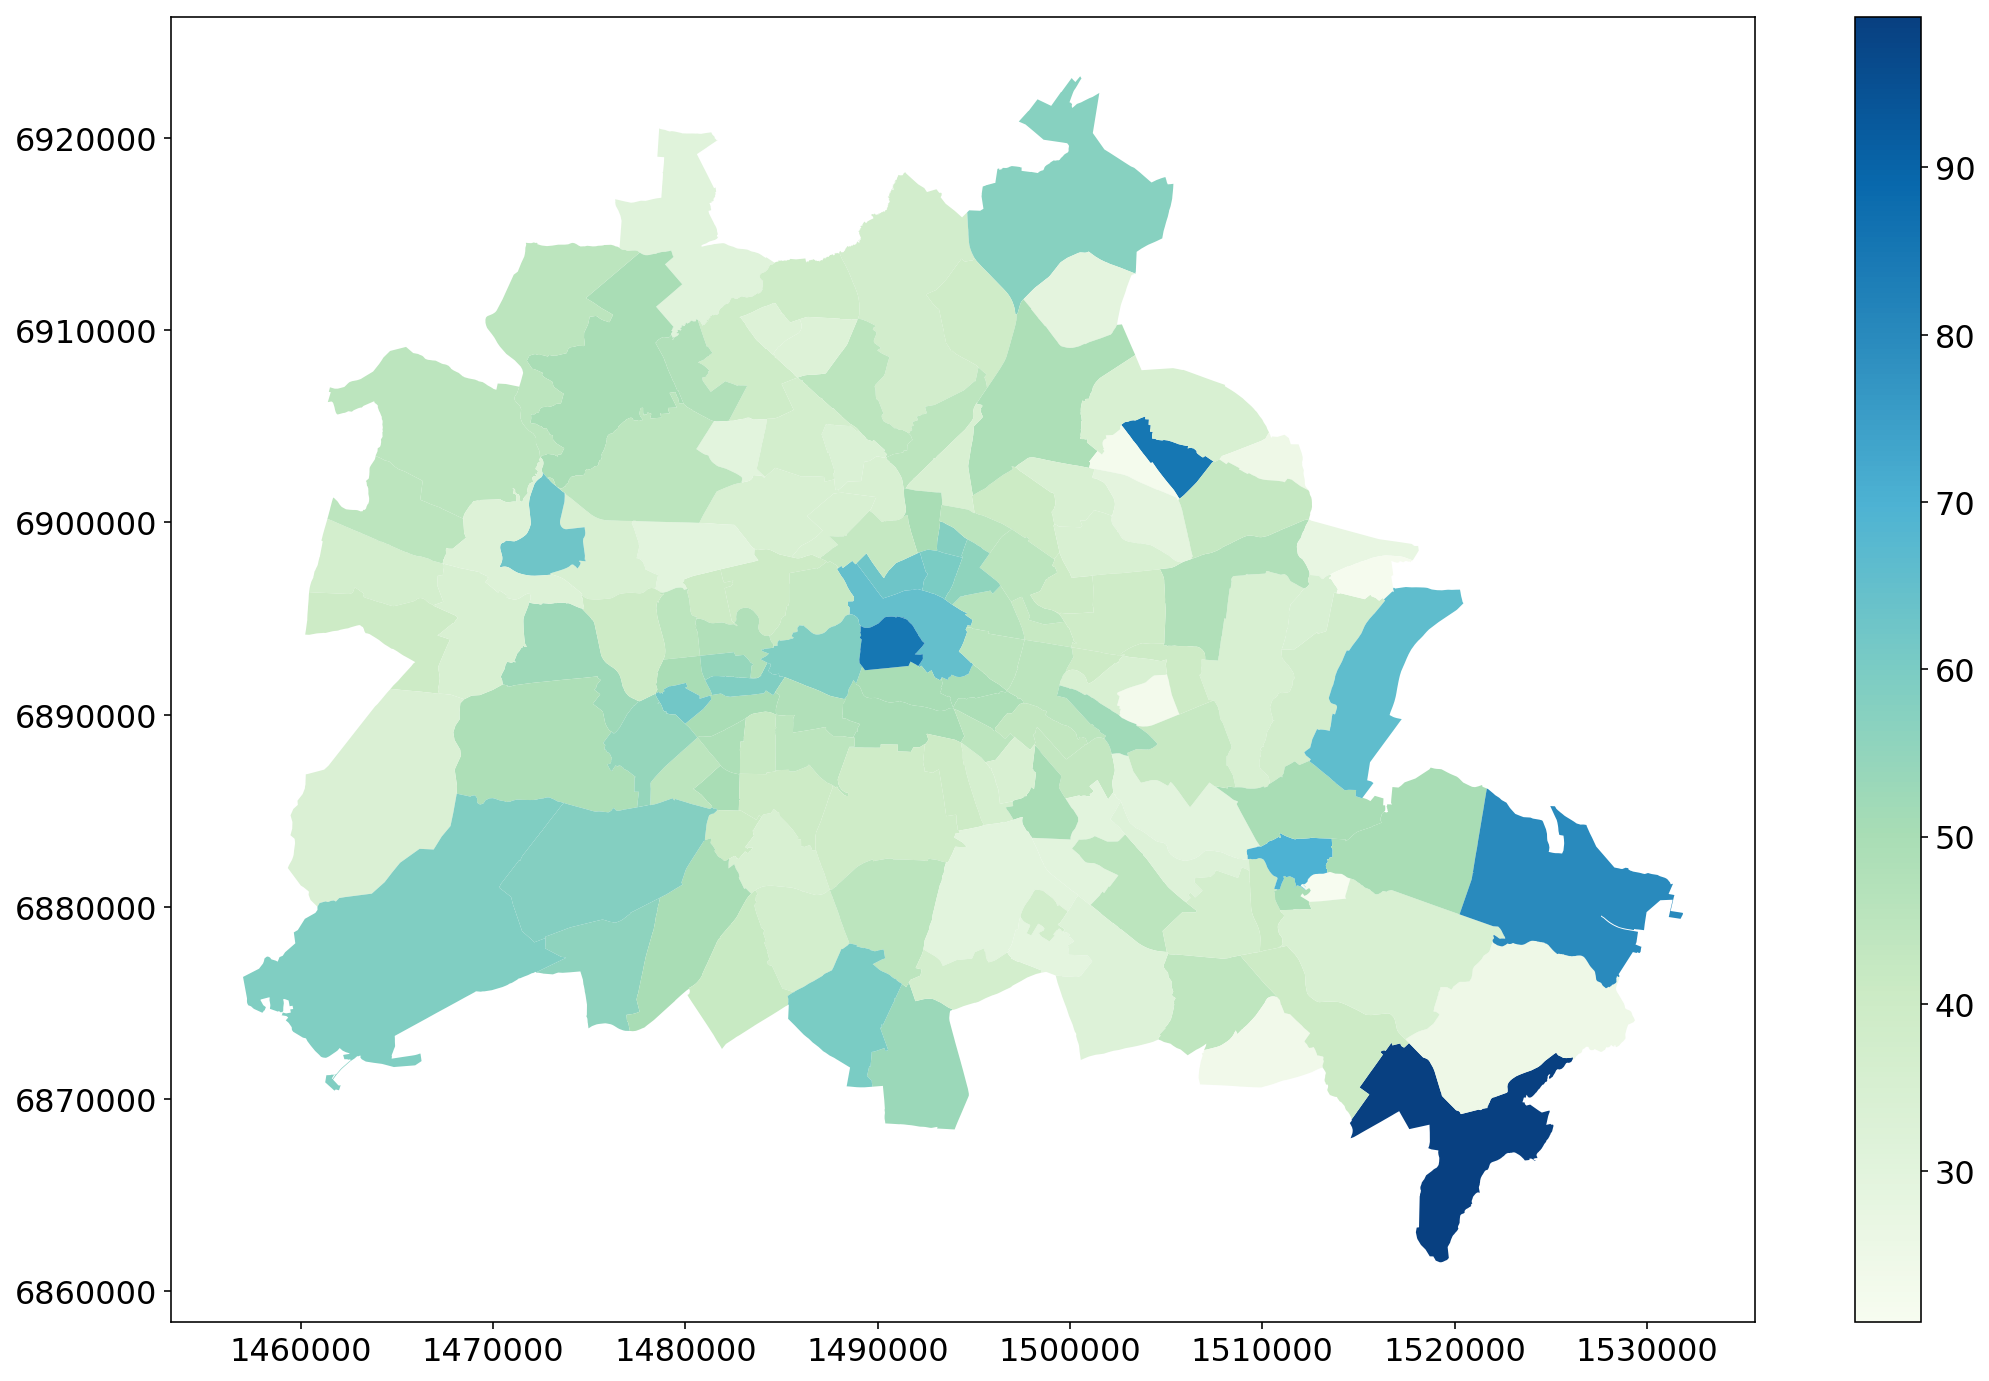

In [15]:
df.plot(column='median_price', figsize=(18, 12), cmap='GnBu', legend=True);

Unless you happen to know something about this area of Germany, interpreting what's going on in this choropleth is likely a little tricky, but we can see there is some variation in median prices across this region.

### Spatial Autocorrelation

Note that if prices were distributed randomly, there would be no clustering of similar values.

To visualize the existence of global spatial autocorrelation, let's take it to the extreme. Let's look at the 68 districts with the highest Airbnb prices and those with the lowest prices.

In [16]:
# get data to dichotomize
y = df['median_price']
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
df['yb'] = yb

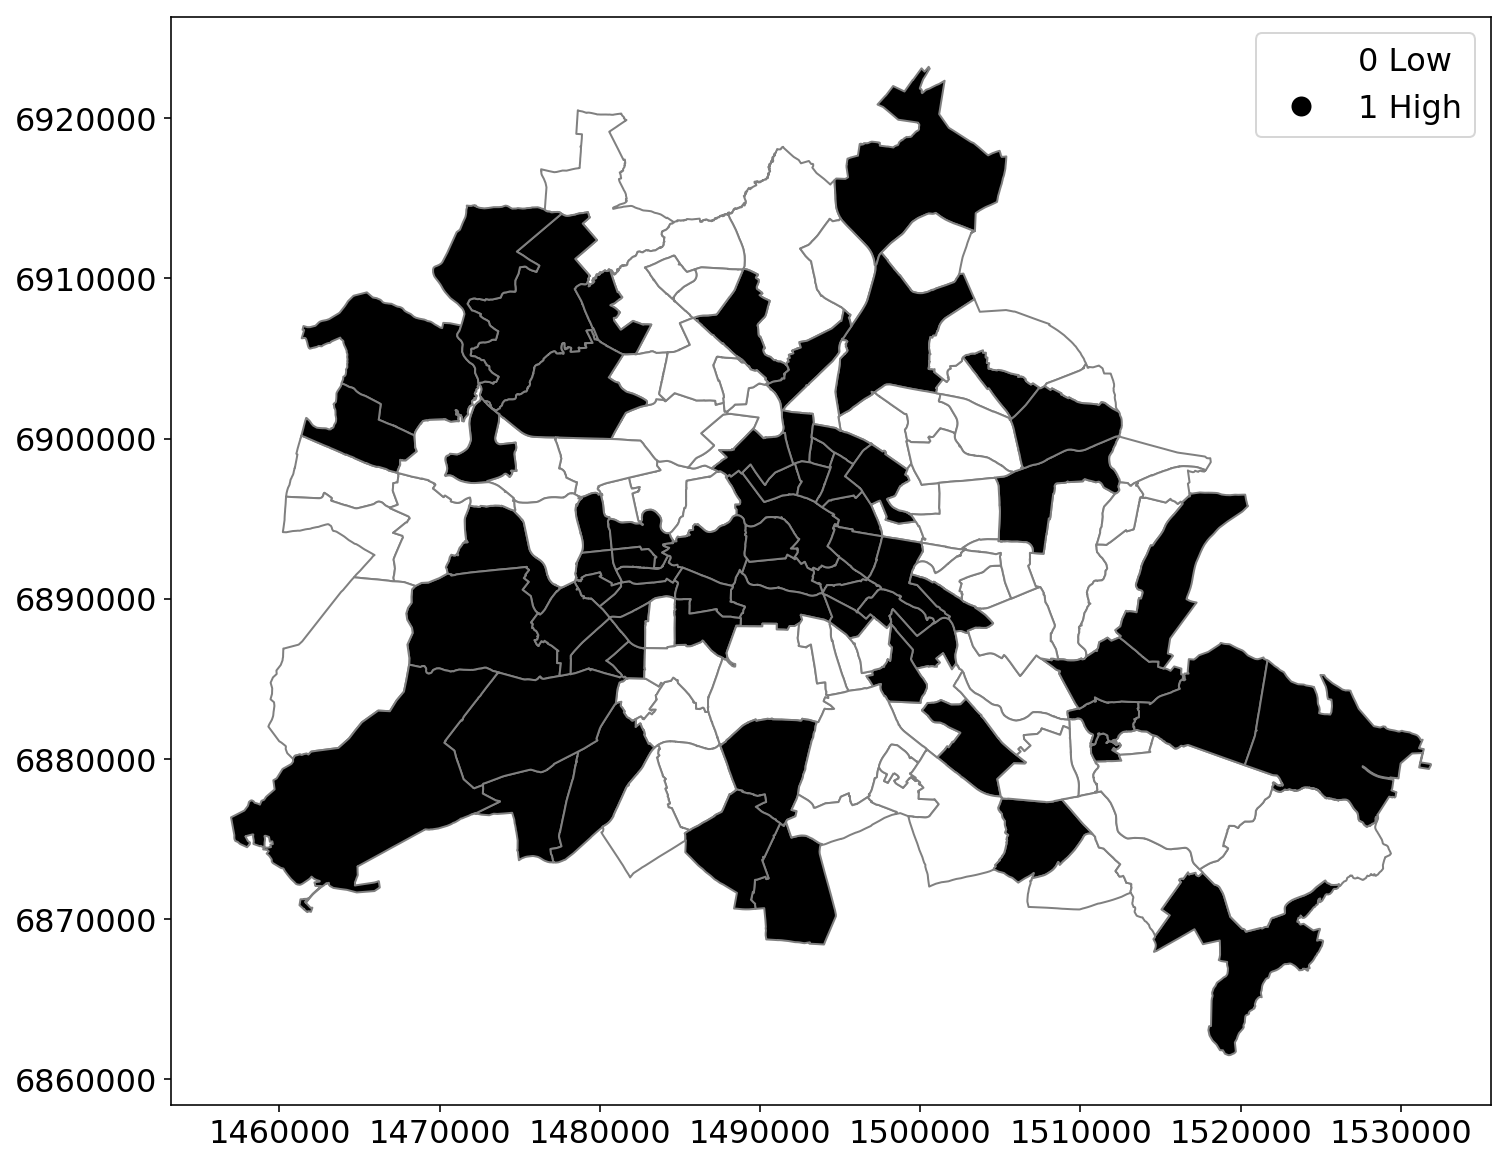

In [17]:
# take a look
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
df.plot(column='yb', cmap='binary',
        edgecolor='grey', legend=True, ax=ax);

### Airbnb Listings: Berlin

- kernel regressions
    - "borrow strength" from nearby observations

A reminder that in geospatial data, there *two simultaneous senses of what is near:*
- things that similar in attribute (classical kernel regression)
- things that are similar in spatial position (spatial kernel regression)


## iclicker Question #2

What features would you consider including in a model to predict an Airbnb's nightly price?

- A) I'm completely lost
- B) I've got some ideas
- C) I'm a little unsure

First, though, let's try to predict the log of an **Airbnb's nightly price** based on a few factors:
- `accommodates`: the number of people the airbnb can accommodate
- `review_scores_rating`: the aggregate rating of the listing
- `bedrooms`: the number of bedrooms the airbnb has
- `bathrooms`: the number of bathrooms the airbnb has
- `beds`: the number of beds the airbnb offers

### Airbnb Listings: The Data

In [18]:
listings = pd.read_csv('https://raw.githubusercontent.com/geopandas/scipy2018-geospatial-data/master/data/berlin-listings.csv.gz')
listings['geometry'] = listings[['longitude', 'latitude']].apply(shp.Point, axis=1)
listings = gpd.GeoDataFrame(listings)
listings.crs = {'init':'epsg:4269'} # coordinate reference system
listings = listings.to_crs(epsg=3857)

In [19]:
listings.shape

(20053, 97)

In [20]:
listings.head()

Unnamed: 0        id                            listing_url  \
0           0  17260587  https://www.airbnb.com/rooms/17260587   
1           1  17227881  https://www.airbnb.com/rooms/17227881   
2           2   1153584   https://www.airbnb.com/rooms/1153584   
3           3   7832750   https://www.airbnb.com/rooms/7832750   
4           4  11634962  https://www.airbnb.com/rooms/11634962   

        scrape_id last_scraped  \
0  20170507222235   2017-05-08   
1  20170507222235   2017-05-08   
2  20170507222235   2017-05-08   
3  20170507222235   2017-05-08   
4  20170507222235   2017-05-08   

                                                name  \
0  Kunterbuntes Zimmer mit eigenem Bad für jedermann   
1                   Modernes Zimmer in Berlin Pankow   
2                          Gästezimmer Berlin-Pankow   
3                  Sonniges Doppelzimmer+Nice Price!   
4     Room for womens in Pankow 30 min from the city   

                                             summary  \
0  Meine Unterkunft ist gut für paare, alleinreis...   
1  Es ist ein schönes gepflegtes und modernes Zim...   
2  Unser Gästezimmer befindet sich im Dachgeschos...   
3  Welcome! Hier vermiete ich ein kleines Wohlfüh...   
4  Gemütliches Zimmer im ruhigen Teil von Berlin....   

                                               space  \
0                                                NaN   
1  Das Haus befindet sich direkt vor eine Tram Ha...   
2  Wenn Ihr eine anspruchsvolles Ambiente sucht, ...   
3  Die Wohnung ist durch Ihre Lage sehr schön hel...   
4  Es handelt sich um ein großes, gemütliches Zim...   

                                         description experiences_offered  \
0  Meine Unterkunft ist gut für paare, alleinreis...                none   
1  Es ist ein schönes gepflegtes und modernes Zim...                none   
2  Unser Gästezimmer befindet sich im Dachgeschos...                none   
3  Welcome! Hier vermiete ich ein kleines Wohlfüh...                none   
4  Gemütliches Zimmer im ruhigen Teil von Berlin....                none   

                      ...                      requires_license license  \
0                     ...                                     f     NaN   
1                     ...                                     f     NaN   
2                     ...                                     f     NaN   
3                     ...                                     f     NaN   
4                     ...                                     f     NaN   

  jurisdiction_names instant_bookable cancellation_policy  \
0                NaN                t            flexible   
1                NaN                t            flexible   
2                NaN                f            flexible   
3                NaN                t            flexible   
4                NaN                f            flexible   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

  calculated_host_listings_count reviews_per_month  \
0                              3              2.00   
1                              1              1.29   
2                              1              1.27   
3                              1              5.43   
4                              1              1.45   

                                      geometry  
0  POINT (1491246.090614242 6906289.705883671)  
1  POINT (1491523.302402494 6905027.621432627)  
2  POINT (1491598.865448017 6907372.952865081)  
3  POINT (1491189.631335848 6906107.655118274)  
4  POINT (1490975.656793601 6906370.805446115)  

[5 rows x 97 columns]

### Airbnb Listings: Outcome Variable

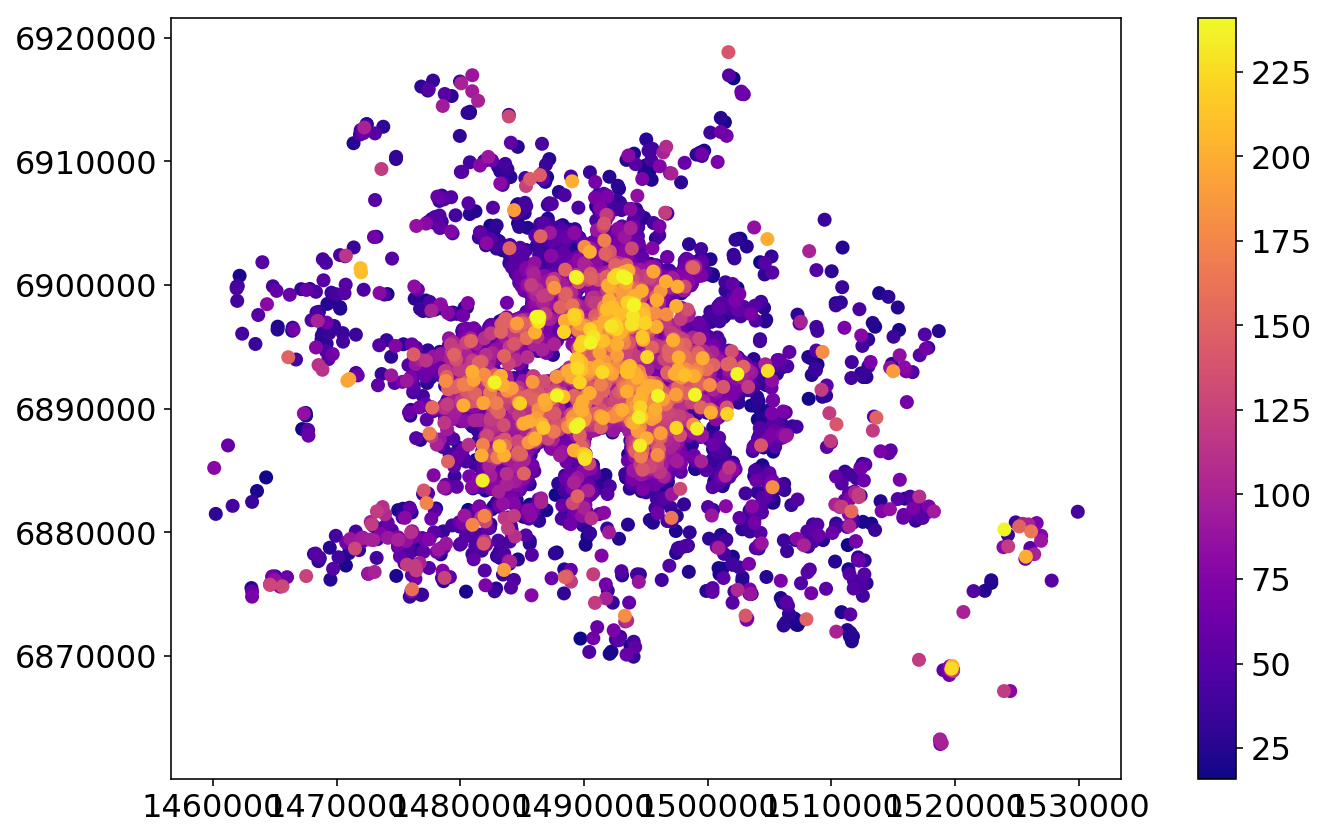

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(11, 7))
divider = make_axes_locatable(ax)
listings.sort_values('price').plot('price', cmap='plasma', 
                                   figsize=(10, 18), ax=ax, legend=True);

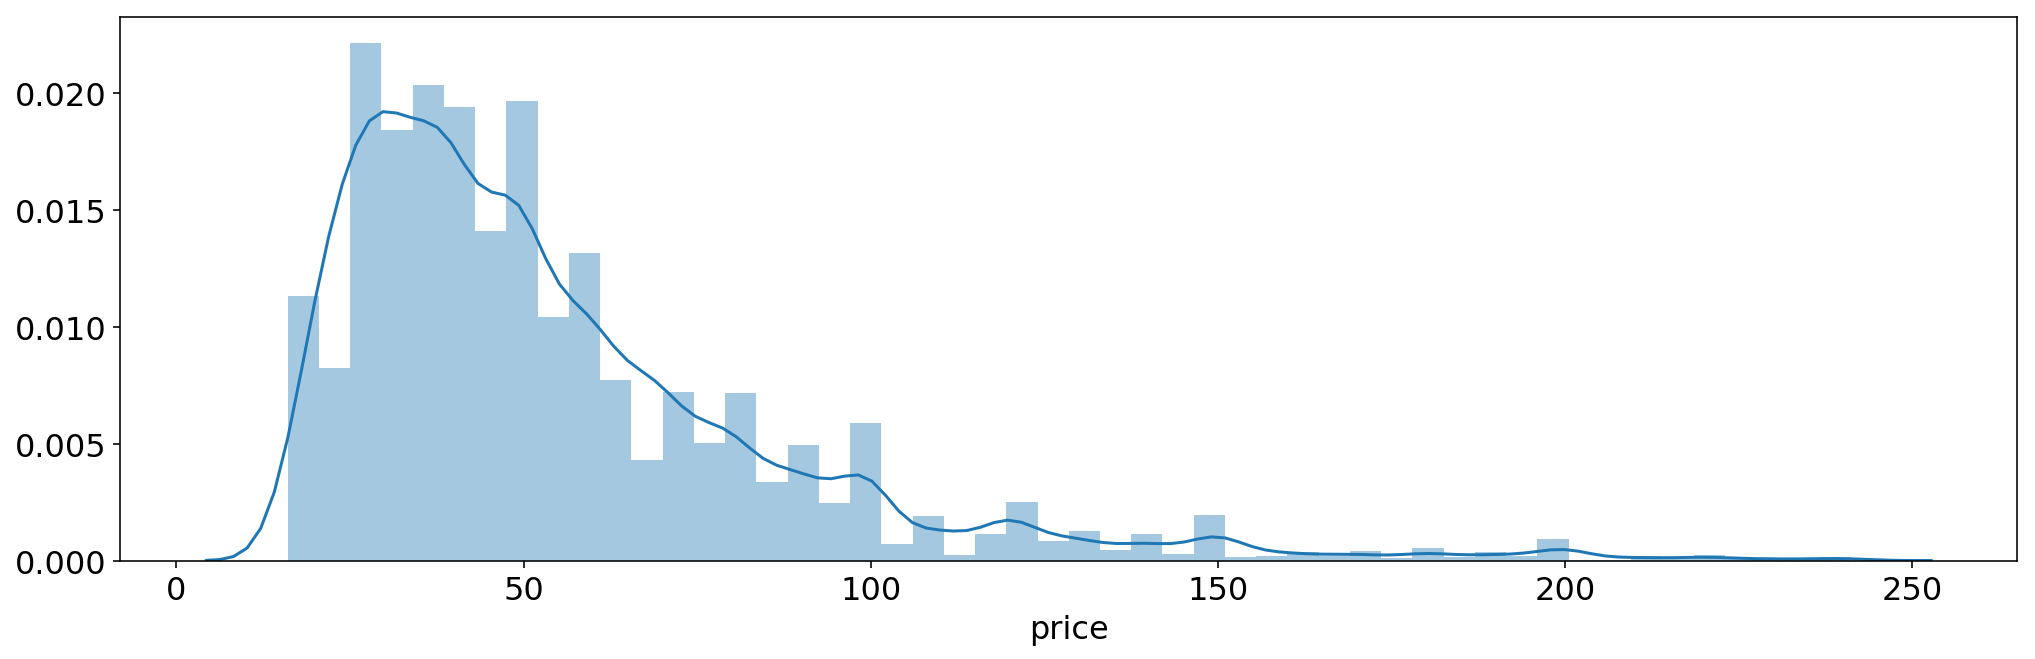

In [22]:
# distribution of price
sns.distplot(listings['price']);

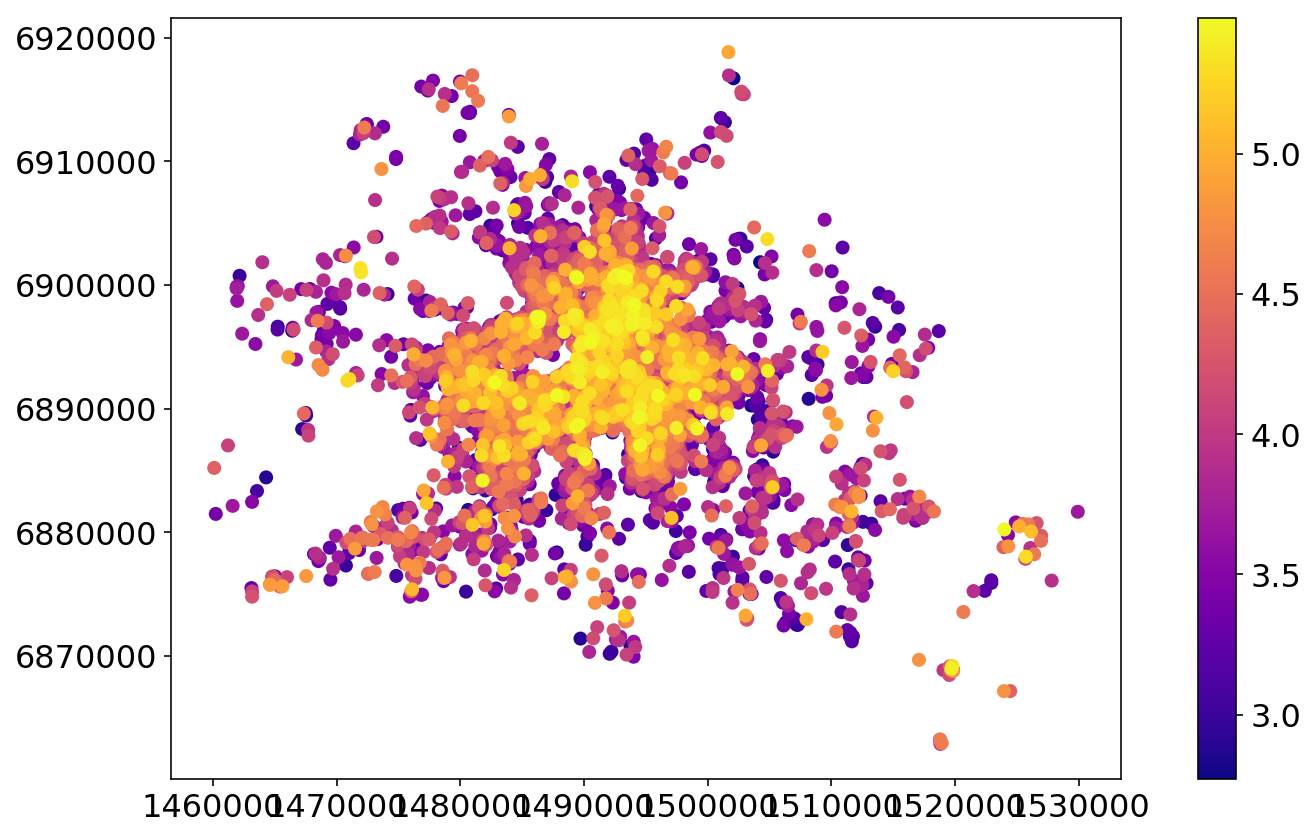

In [23]:
listings['price_log'] = np.log(listings['price'])

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
divider = make_axes_locatable(ax)
listings.sort_values('price_log').plot('price_log', cmap='plasma', 
                                       figsize=(10, 18), ax=ax, legend=True);

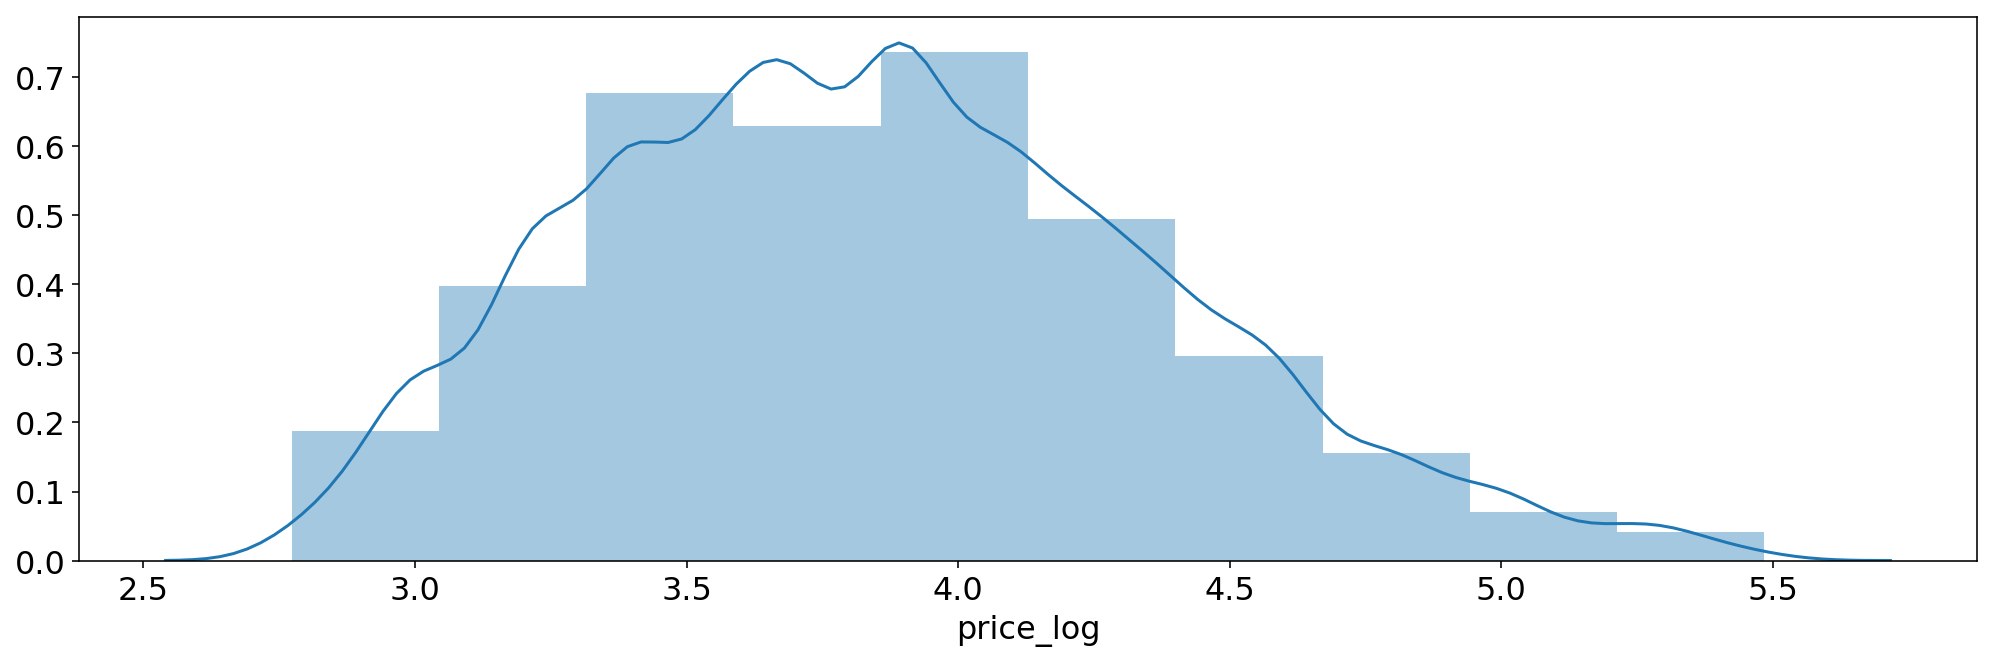

In [24]:
# distribution of log price
sns.distplot(listings['price_log'], bins=10);

### The Models

In [25]:
# get data for attributes model
model_data = listings[['accommodates', 'review_scores_rating', 
                       'bedrooms', 'bathrooms', 'beds', 
                       'price', 'geometry']].dropna()

In [26]:
# specify predictors (X) and outcome (y)
Xnames = ['accommodates', 'review_scores_rating', 
               'bedrooms', 'bathrooms', 'beds' ]
X = model_data[Xnames].values
X = X.astype(float)
y = np.log(model_data[['price']].values)

We'll need the spatial coordinates for each listing...

In [27]:
# get spatial coordinates
coordinates = np.vstack(model_data.geometry.apply(lambda p: np.hstack(p.xy)).values)

`scikit-learn`'s neighbor regressions are contained in the sklearn.neighbors module, and there are two main types:

- **KNeighborsRegressor** -  uses a k-nearest neighborhood of observations around each focal site
- **RadiusNeighborsRegressor** - considers all observations within a fixed radius around each focal site.

Further, these methods can use inverse distance weighting to rank the relative importance of sites around each focal; in this way, near things are given more weight than far things, even when there's a lot of near things.

#### Training & Test

In [28]:
# specify training and test set
shuffle = np.random.permutation(len(y))
num = int(0.8*len(shuffle))
train, test = shuffle[:num],shuffle[num:]

#### Three Models
So, let's fit three models:
- `spatial`: using inverse distance weighting on the nearest 100 neighbors geograpical space
- `attribute`: using inverse distance weighting on the nearest 100 neighbors in attribute space
- `both`: using inverse distance weighting in both geographical and attribute space. 

In [29]:
# spatial
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=100)
spatial = KNNR.fit(coordinates[train,:],
                  y[train,:])
# attribute
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=100)
attribute = KNNR.fit(X[train,:],
                    y[train,])
# both
KNNR = skn.KNeighborsRegressor(weights='distance', n_neighbors=100)
both = KNNR.fit(np.hstack((coordinates,X))[train,:],
                y[train,:])

## iclicker Question

Which of the following would you expect to be more predictive?

- A) Don't choose A
- B) spatial - distance in geographical space
- C) attribue - distance in feature/attribute space

### Performance

To score them, I'm going to look at the scatterplot and get their % explained variance:

#### Training Data

In [30]:
# generate predictions in the training set
sp_ypred_train =  spatial.predict(coordinates[train,:])  # spatial
att_ypred_train = attribute.predict(X[train,:])          # attribute
both_ypred_train = both.predict(np.hstack((X,coordinates))[train,:]) # combo

In [31]:
# variance explained in training data
(skm.explained_variance_score(y[train,], sp_ypred_train),
 skm.explained_variance_score(y[train,], att_ypred_train),
 skm.explained_variance_score(y[train,], both_ypred_train))

(1.0, 0.46932997738211846, -1.5333541103501602e-09)

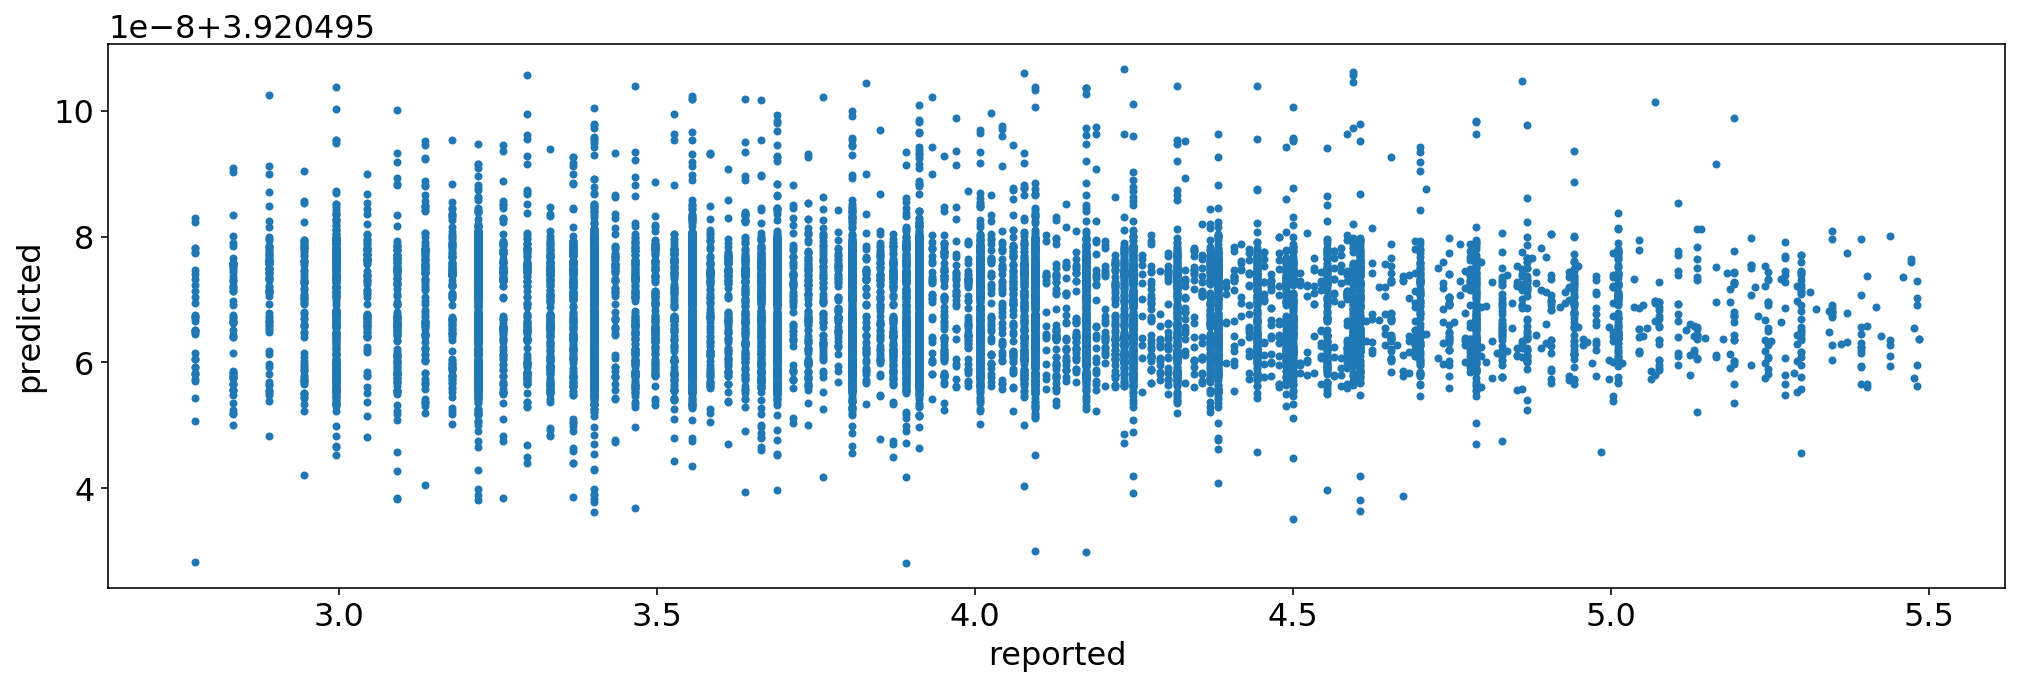

In [34]:
# take a look at predictions
plt.plot(y[train,], both_ypred_train, '.')
plt.xlabel('reported')
plt.ylabel('predicted');

#### Test Data

In [35]:
# generate predictions in the test set
sp_ypred =  spatial.predict(coordinates[test,:])
att_ypred = attribute.predict(X[test,:])
both_ypred = both.predict(np.hstack((X,coordinates))[test,:])

In [36]:
(skm.explained_variance_score(y[test,], sp_ypred),
 skm.explained_variance_score(y[test,], att_ypred),
 skm.explained_variance_score(y[test,], both_ypred))

(0.1200794431183323, 0.3200767723969523, -2.453856007278432e-09)

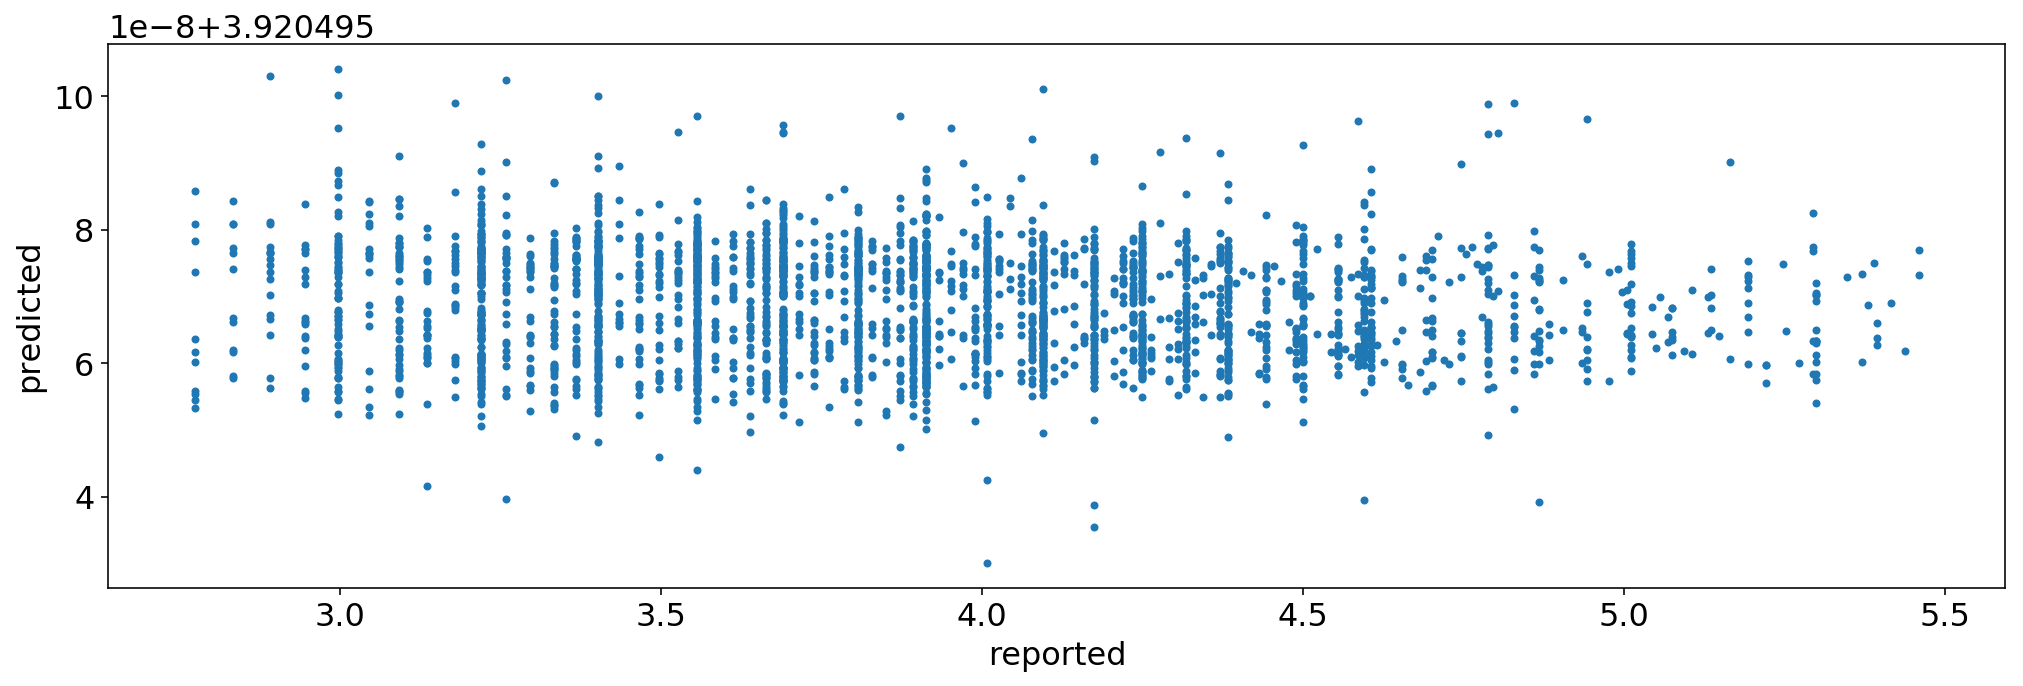

In [39]:
# take a look at predictions
plt.plot(y[test,], both_ypred, '.')
plt.xlabel('reported')
plt.ylabel('predicted');

### Model Improvement

None of these models is performing particularly well...

Cosiderations for improvement:
- features included in attribute model
- model tuning (i.e. number of nearest neighbors)
- model selected
- etc...


One method that can exploit the fact that local data may be more informative in predicting $y$ at site $i$ than distant data is **Geographically Weighted Regression**, a type of Generalized Additive Spatial Model. Kind of like a Kernel Regression, GWR conducts a bunch of regressions at each training site only considering data near that site. This means it works like the kernel regressions above, but uses *both* the coordinates *and* the data in $X$ to predict $y$ at each site. It optimizes its sense of "local" depending on some information criteria or fit score.

You can find this in the `gwr` package, and significant development is ongoing on this at `https://github.com/pysal/gwr`.